# Telco Customer Churn Rate Prediction

### 1. Problem Definition

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

> Based on the given features of Telco Customer Data, can we predict the customer behaviour & retention of the services (Churn Rate)

### 2. Data & Features

The data consists of 1 target variable (Churn) to predict whether the customer has left within the last month based on the customer behaviour features. The Target variable is a binary and classification problem, with 20 feature variables. The dataset is used from Kaggle dataset called 'Telco Customer Churn' (https://www.kaggle.com/datasets/blastchar/telco-customer-churn). The raw data contains 7043 rows (customers) and 21 columns (features).


The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

### 3. Evaluation
> Experimental machine learning project on how customer behaviour affects the rate of customer churn/left the services within the last month

> The target of the customer churn rate approach is to get more than 90% accuracy in order for this project to succeed

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

C:\Users\Agis\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Agis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Agis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# Read the dataset
df = pd.read_csv('dataset/Telco-Customer-Churn.csv')

In [3]:
# Show overall dataset
pd.set_option('max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## EDA (Exploratory Data Analysis)

In [4]:
# First 10 rows
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


Dataset's Information and Description
- Data Types
- NULL Values
- Statistical Analysis

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Check if there is NULL values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As can be seen above, check "TotalCharges" variable. The variable supposed to be float64 type since it contains numerical value instead of string. Therefore, We convert it to float by turning the empty whitespace to 0 and then convert it.

In [4]:
#Convert TotalCharges data type into float
df['TotalCharges'].replace(" ", 0, inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(float)
df['TotalCharges'].dtype

dtype('float64')

In [9]:
# Normalized value counts
df.Churn.value_counts(normalize=True)

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [10]:
# Compare target column with sex column
pd.crosstab(df.Churn, df.gender)

gender,Female,Male
Churn,,
No,2549,2625
Yes,939,930


There are more customers who has not left within the last month in the dataset (which is "0")

In [5]:
# Since I am using Dark Mode google extension, I change the plot style to make some font colours visible
plt.style.use('seaborn')

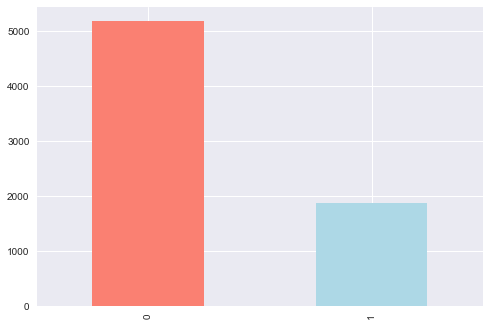

In [54]:
# Plot the value counts with a bar graph
df.Churn.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In this plotting, we can conclude that the dataset consists of more "No" values than "Yes" which indicates that the dataset is unbalanced with customers that has left within the last month by 73% and customers that has not left by 27%.

## Data Visualization

This section will begin data visualization by plotting to begin analyze the data and improve understanding based on the Telco Customer Dataset.

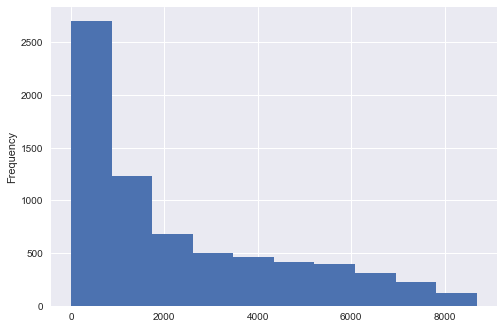

In [44]:
# Total Charges Histogram
df.TotalCharges.plot.hist();

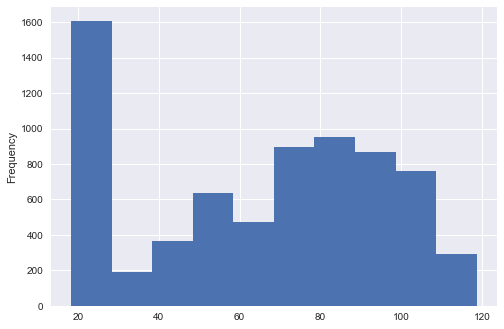

In [45]:
df.MonthlyCharges.plot.hist();

### Feature Engineering

This section will demonstrate how some of the features will be transformed into numerical values for simplifying and speeding up data transformations while also enhancing model accuracy.

1. Transform categorical values into numerical values (e.g. turn "Yes" or "No" value into 1 and 0)

In [14]:
# Get a list of categorie values for each categorical variables
print(df.MultipleLines.unique())
print(df.InternetService.unique())
print(df.OnlineSecurity.unique())
print(df.OnlineBackup.unique())
print(df.DeviceProtection.unique())
print(df.TechSupport.unique())
print(df.StreamingTV.unique())
print(df.StreamingMovies.unique())
print(df.Contract.unique())
print(df.PaymentMethod.unique())

['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [6]:
# Replace every variables data types that has string value like "Yes" and "No" to numerical value (0 and 1)

binary_dict = {'Yes': 1, 'No': 0}
gender_dict = {'Male': 1, 'Female': 0}
internet_dict = {'Yes': 1, 'No': 0, 'No internet service': 0} # Assume 'No' and 'No internet service' to be 0
contract_dict = {'Month-to-month': 1, 'One year': 2, 'Two year': 3} # Ranked based on the given description
payment_dict = {'Electronic check': 1, 'Mailed check': 2,'Bank transfer (automatic)': 3, 'Credit card (automatic)': 4}
phone_dict = {'Yes': 1, 'No': 0, 'No phone service': 0}
service_dict = {'DSL': 1, 'Fiber optic': 1, 'No': 0} # Assume both DSL & Fiber Optic considered having internet service/Yes

df['gender'] = df['gender'].map(gender_dict)

df['Churn'] = df['Churn'].map(binary_dict)
df['Partner'] = df['Partner'].map(binary_dict)
df['Dependents'] = df['Dependents'].map(binary_dict)
df['PhoneService'] = df['PhoneService'].map(binary_dict)
df['PaperlessBilling'] = df['PaperlessBilling'].map(binary_dict)

df['MultipleLines'] = df['MultipleLines'].map(phone_dict)
              
df['InternetService'] = df['InternetService'].map(service_dict)
              
df['OnlineSecurity'] = df['OnlineSecurity'].map(internet_dict)
df['OnlineBackup'] = df['OnlineBackup'].map(internet_dict)
df['DeviceProtection'] = df['DeviceProtection'].map(internet_dict)
df['TechSupport'] = df['TechSupport'].map(internet_dict)
df['StreamingTV'] = df['StreamingTV'].map(internet_dict)
df['StreamingMovies'] = df['StreamingMovies'].map(internet_dict)
              
df['Contract'] = df['Contract'].map(contract_dict)
df['PaymentMethod'] = df['PaymentMethod'].map(payment_dict)

In [7]:
# Drop unnecessary columns
df.drop('customerID', axis = 1,inplace = True)

In [17]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,1,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,2,0,2,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,1,1,2,53.85,108.15,1
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,2,0,3,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,1,1,1,70.70,151.65,1


### Correlation Analysis

Since there are many features that may correlate with the target variable (Churn), we should do correlation analysis to see which features correlates strongly or weakly to the target variable (Churn).

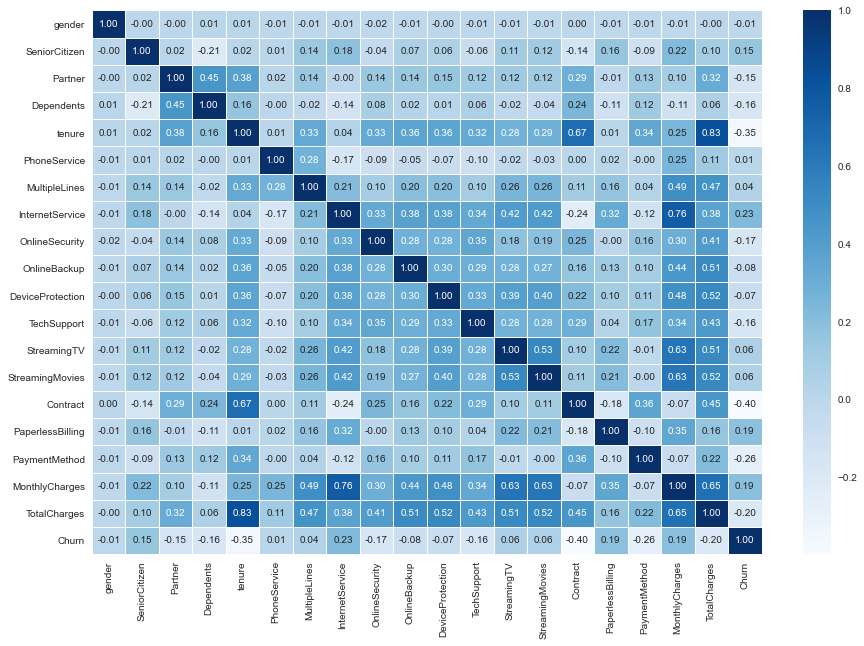

In [8]:
import seaborn as sns

#Correlation Analysis
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
plt.xticks(rotation=90)
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="Blues");

Based on the figure above, we can see each variables and their relationship with other variable.

## Data Modelling

Split X & Y Variable

In [2]:
X = df.drop("Churn", axis = 1)
y = df["Churn"].values

NameError: name 'df' is not defined

In [10]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,1,29.85,29.85
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,2,0,2,56.95,1889.50
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,1,1,2,53.85,108.15
3,1,0,0,0,45,0,0,1,1,0,1,1,0,0,2,0,3,42.30,1840.75
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,1,1,1,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,1,0,1,1,1,1,2,1,2,84.80,1990.50
7039,0,0,1,1,72,1,1,1,0,1,1,0,1,1,2,1,4,103.20,7362.90
7040,0,0,1,1,11,0,0,1,1,0,0,0,0,0,1,1,1,29.60,346.45
7041,1,1,1,0,4,1,1,1,0,0,0,0,0,0,1,1,2,74.40,306.60


In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


Now that all feature variables has been converted into numerical values, the data can now be used to train ML model

In [22]:
y

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

#### Train and Test Split

Since there are over 7k data points, we experiment on 60:40 Train/Split set as the baseline upon training the model

In [11]:
from sklearn.model_selection import train_test_split

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, # independent variables 
                                                    y, # dependent variable
                                                    test_size = 0.4, # percentage of data to use for test set
                                                    random_state=420) # random_set to get code producibility

#### MinMaxScaler
This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [1]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\Agis\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Agis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Agis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


NameError: name 'X_train' is not defined

Model choices

Now we've got our data prepared, we can start to fit models. We'll be using the following and comparing their results.

- LinearSVC
- SVC
- RandomForestClassifier

In [43]:
# Import the models from SKlearn

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(max_iter=150),
          "Random Forest": RandomForestClassifier(),
          "KNN": KNeighborsClassifier(),
          "SGD Classifier": SGDClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(420)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores


model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,bes
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic Regression': '80.34%',
 'Random Forest': '79.28%',
 'KNN': '75.73%',
 'SGD Classifier': '74.8%'}

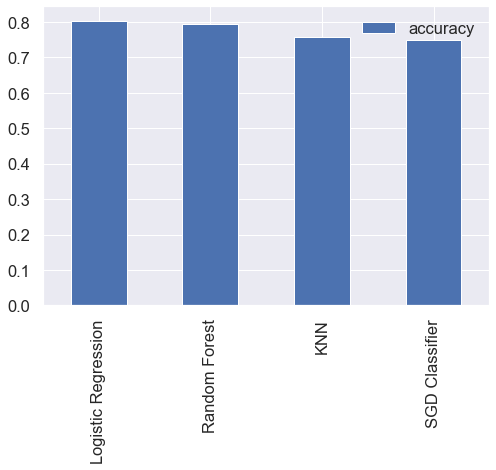

In [34]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

The three models performs decently well while both RandomForest & Logistic Regression has accuracy over 80%. Therefore, I decided to perform hyperparameter tuning for LinearSVC and Logistic Regression to see how we can improve.

## Data Evaluation & Experimentation

#### Hyperparameter Tuning

We use RandomizedSearchCV & GridSearchCV

In [59]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [137]:
# Set Hyperparameter for both SVC and Logistic Regression

lr_grid = {"max_iter": [150],
           "solver": ['liblinear'],
           "C": np.logspace(-4, 4, 20)}
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

##### Logistic Regression

In [138]:
# Setup random seed
np.random.seed(420)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=lr_grid,
                                verbose=True,
                                n_jobs=-1)

# Fit random hyperparameter search model
rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [139]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'max_iter': 150, 'C': 206.913808111479}

In [140]:
rs_log_reg.score(X_test, y_test)

0.8041163946061036

##### RandomForestClassifier

In [141]:
# Setup random seed
np.random.seed(420)

# Setup random hyperparameter search for LinearSVC
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                            param_distributions=rf_grid,
                            verbose=True,
                            n_jobs=-1)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [142]:
rs_rf.best_params_

{'n_estimators': 460,
 'min_samples_split': 14,
 'min_samples_leaf': 13,
 'max_depth': None}

In [143]:
rs_rf.score(X_test, y_test)

0.8044712562100781

##### GridSearchCV for RandomForestClassifier

In [150]:
rf_gs_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Setup random seed
np.random.seed(420)

# Setup random hyperparameter search for LinearSVC
gs_rf = GridSearchCV(RandomForestClassifier(),
                            param_grid=rf_gs_grid,
                            verbose=True)

# Fit random hyperparameter search model
gs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [153]:
gs_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [154]:
gs_rf.score(X_test, y_test)

0.8044712562100781

In [15]:
rf_1 = RandomForestClassifier(criterion='entropy', max_depth=8, max_features='log2', n_estimators=200)

rf_1.fit(X_train, y_train)

rf_1.score(X_test, y_test)

0.8080198722498225

We see the best parameters of the RandomForestClassifier, next section we begin evaluate the model

In [23]:
# Make preidctions on test data
y_preds = rf_1.predict(X_test)

In [24]:
y_preds

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [25]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### ROC & AUC Score

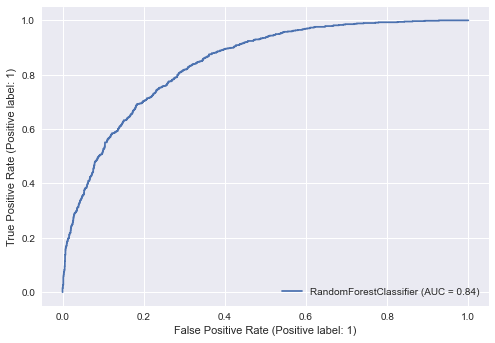

In [21]:
from sklearn.metrics import RocCurveDisplay

rf_disp = RocCurveDisplay.from_estimator(rf_1, X_test, y_test)

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

# Display confusion matrix
print(confusion_matrix(y_test, y_preds))

[[1885  220]
 [ 321  392]]


In [29]:
# Show classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      2105
           1       0.64      0.55      0.59       713

    accuracy                           0.81      2818
   macro avg       0.75      0.72      0.73      2818
weighted avg       0.80      0.81      0.80      2818



In [30]:
# Import cross_val_score
from sklearn.model_selection import cross_val_score

# Cross-validated accuracy score
cv_acc = cross_val_score(rf_1,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.80908446, 0.80482612, 0.78566359, 0.81321023, 0.79829545])

In [31]:
# Average Cross-Validation Accuracy Score
cv_acc = np.mean(cv_acc)
cv_acc

0.8022159695786826

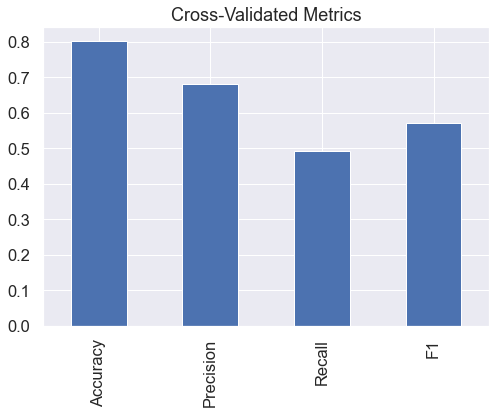

In [32]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(rf_1,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring

cv_recall = np.mean(cross_val_score(rf_1,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring

cv_f1 = np.mean(cross_val_score(rf_1,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring

# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

## Conclusion

In conclusion, I have tested 4 different Machine Learning models 
- Logistic Regression: 80.34%
- Random Forest : 79.28%
- KNN: 75.73%
- SGD Classifier: 74.8%

and choose 2 best ML models to proceed with Hyperparameter Tuning.
- Random Forest
- Logistic Regression

During the Hyperparameter Tuning using RandomizedSearchCV & GridSearchCV, RandomForestClassifier results the best accuracy of **80.8%**.

In the development of the project, there may be some adjustment and improvements based on the hyperparameter tuning or another method to improve the model performance resulting the best accuracy in predicting the Telco Customer Churn.